In [1]:
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras.models import model_from_json

2025-07-09 07:54:40.409996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752047680.683149      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752047680.771037      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
def load_json_model(json_path: str, weights_path: str) -> Model:
    """Creates a model based on the given json file and weights.

    Args:
        json_path (str): Path to the model structure json file.
        weights_path (str): Path to the weights of that model.

    Returns:
        tf.keras.Model
    """
    with open(json_path) as json_file:
        model_json = json_file.read()

    model = model_from_json(model_json)
    model.load_weights(weights_path)
    return model

In [3]:
vgg_16 = load_json_model(
    json_path= r'/kaggle/input/vgg-16-fer-data-aug/tensorflow2/default/1/vgg16_model_structure.json',
    weights_path= r'/kaggle/input/vgg-16-fer-data-aug/tensorflow2/default/1/vgg_16_model_data_aug.weights.h5'
)
vgg_16.summary()

I0000 00:00:1752047697.396159      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 6, 6, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 100,886,103 (384.85 MB)

 Trainable params: 33,627,719 (128.28 MB)

 Non-trainable params: 2,944 (11.50 KB)

 Optimizer params: 67,255,440 (256.56 MB)

In [ ]:
def extract_feature_maps(
    model: Model, 
    *, 
    layer_name: str = 'conv2d'
) -> list[tf.Tensor]:
    """Extracts all the feature maps from convolution layers of given model.

    Args:
        model (tf.keras.Model): The model whose feature maps to extract.
        layer_name (str, optional): Name of layer to extract. Defaults to 'conv2d'.

    Returns:
        list[tf.Tensor]: A list of all feature maps.
    """
    feature_maps = [layer.output for layer in model.layers if layer_name in layer.name]
    return feature_maps

In [5]:
extract_feature_maps(vgg_16)

[<KerasTensor shape=(None, 48, 48, 64), dtype=float32, sparse=False, name=keras_tensor_5>,
 <KerasTensor shape=(None, 48, 48, 64), dtype=float32, sparse=False, name=keras_tensor_8>,
 <KerasTensor shape=(None, 24, 24, 128), dtype=float32, sparse=False, name=keras_tensor_23>,
 <KerasTensor shape=(None, 24, 24, 128), dtype=float32, sparse=False, name=keras_tensor_30>,
 <KerasTensor shape=(None, 12, 12, 256), dtype=float32, sparse=False, name=keras_tensor_57>,
 <KerasTensor shape=(None, 12, 12, 256), dtype=float32, sparse=False, name=keras_tensor_68>,
 <KerasTensor shape=(None, 12, 12, 256), dtype=float32, sparse=False, name=keras_tensor_80>,
 <KerasTensor shape=(None, 6, 6, 512), dtype=float32, sparse=False, name=keras_tensor_122>,
 <KerasTensor shape=(None, 6, 6, 512), dtype=float32, sparse=False, name=keras_tensor_138>,
 <KerasTensor shape=(None, 6, 6, 512), dtype=float32, sparse=False, name=keras_tensor_155>,
 <KerasTensor shape=(None, 3, 3, 512), dtype=float32, sparse=False, name=kera

In [ ]:
def create_feature_map_model(model: Model) -> Model:
    """Takes a Convolutional Neural Network (CNN) model and create a new model where the feature maps of the CNN are the outputs of the returned model.
    """
    f_model = Model(
        inputs= model.inputs,
        outputs= extract_feature_maps(model)
    )
    return f_model

In [7]:
f_map_model = create_feature_map_model(vgg_16)
f_map_model.summary()

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 48, 48, 1)      │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 48, 48, 1)      │              0 │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0],     │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 48, 48, 64)     │            640 │ sequential[1][0],      │
│                           │                        │                │ sequential[2][0],      │
│                           │                        │                │ sequential[5][0],      │
│                           │                        │                │ sequential[6][0],      │
│                           │                        │                │ sequential[9][0],      │
│                           │                        │                │ sequential[10][0],     │
│                           │                        │                │ sequential[11][0],     │
│                           │                        │                │ sequential[14][0],     │
│                           │                        │                │ sequential[15][0],     │
│                           │                        │                │ sequential[16][0],     │
│                           │                        │                │ sequential[19][0],     │
│                           │                        │                │ sequential[20][0],     │
│                           │                        │                │ sequential[21][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 48, 48, 64)     │         36,928 │ conv2d[1][0],          │
│                           │                        │                │ conv2d[4][0],          │
│                           │                        │                │ conv2d[5][0],          │
│                           │                        │                │ conv2d[8][0],          │
│                           │                        │                │ conv2d[9][0],          │
│                           │                        │                │ conv2d[10][0],         │
│                           │                        │                │ conv2d[13][0],         │
│                           │                        │                │ conv2d[14][0],         │
│                      

 Total params: 14,717,376 (56.14 MB)

 Trainable params: 14,715,456 (56.14 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [8]:
paths = [
    r'/kaggle/input/fer2013/test/angry/PrivateTest_10131363.jpg',
    r'/kaggle/input/fer2013/test/disgust/PrivateTest_11895083.jpg',
    r'/kaggle/input/fer2013/test/fear/PrivateTest_10153550.jpg',
    r'/kaggle/input/fer2013/test/happy/PrivateTest_10077120.jpg',
    r'/kaggle/input/fer2013/test/neutral/PrivateTest_10086748.jpg',
    r'/kaggle/input/fer2013/test/sad/PrivateTest_10247676.jpg',
    r'/kaggle/input/fer2013/test/surprise/PrivateTest_10072988.jpg'
]

emotion_images = []
for path in paths:
    face_img = cv2.imread(path)
    face_gray = cv2.cvtColor(face_img, code= cv2.COLOR_BGR2GRAY)
    face_gray = cv2.resize(face_gray, (48, 48))
    face_gray = tf.expand_dims(face_gray, axis= -1)   # adding color channel
    face_gray = tf.expand_dims(face_gray, axis= 0)    # batch dimension
    emotion_images.append(face_gray)

In [9]:
f_maps = f_map_model.predict(emotion_images[0])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 48, 48, 1))
  warnings.warn(msg)
I0000 00:00:1752047704.838263      60 service.cc:148] XLA service 0x7d938400cf70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752047704.839109      60 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1752047705.494208      60 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


I0000 00:00:1752047707.154542      60 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [10]:
for f_map in f_maps:
    print(f_map.shape)

(1, 48, 48, 64)
(1, 48, 48, 64)
(1, 24, 24, 128)
(1, 24, 24, 128)
(1, 12, 12, 256)
(1, 12, 12, 256)
(1, 12, 12, 256)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 6, 6, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)
(1, 3, 3, 512)


In [ ]:
def plot_feature_maps(
    f_maps: list[tf.Tensor], 
    *, 
    figsize: tuple[int, int] = (16, 16), 
    file_name: str = 'feature_maps.png'
) -> None:
    """This is the main visualization function. It only visualizes 16 feature maps from each convolutional layer.

    Args:
        f_maps (list[tf.Tensor]): List of feature maps.
        figsize (tuple[int, int], optional): Figure size for matplotlib.pyplot. Defaults to (16, 16).
        file_name (str, optional): File path/name where to save the plot. Defaults to 'feature_maps.png'.
    """
    total_layers = len(f_maps)
    start = 0
    
    plt.figure(figsize= figsize)
    
    for conv_layer, f_map in enumerate(f_maps, start= 1):
        for j in range(16):
            plt.subplot(total_layers, 16, j + 1 + start)
            plt.imshow(f_map[0, :, :, j])
            plt.axis('off')
            plt.title(f'C:{conv_layer},F:{j + 1}', fontsize= 9)
    
        start += 16
    
    plt.show()
    plt.savefig(file_name)

In [12]:
different_emotion_feature_maps = []

for img in emotion_images:
    different_emotion_feature_maps.append(f_map_model.predict(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


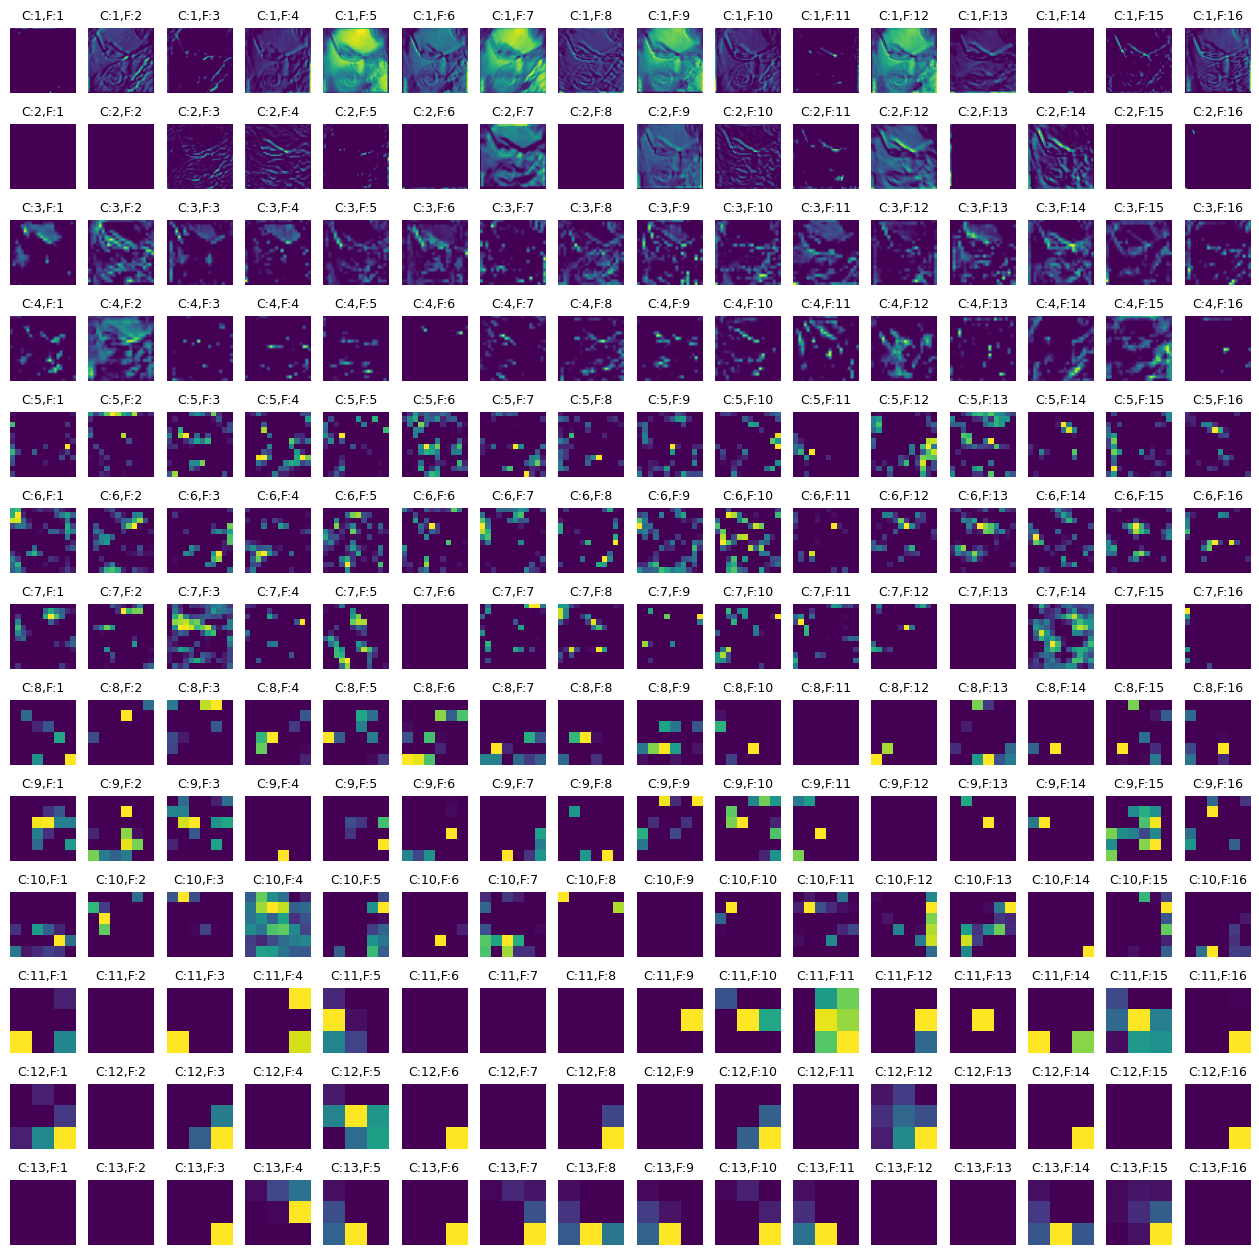

<Figure size 640x480 with 0 Axes>

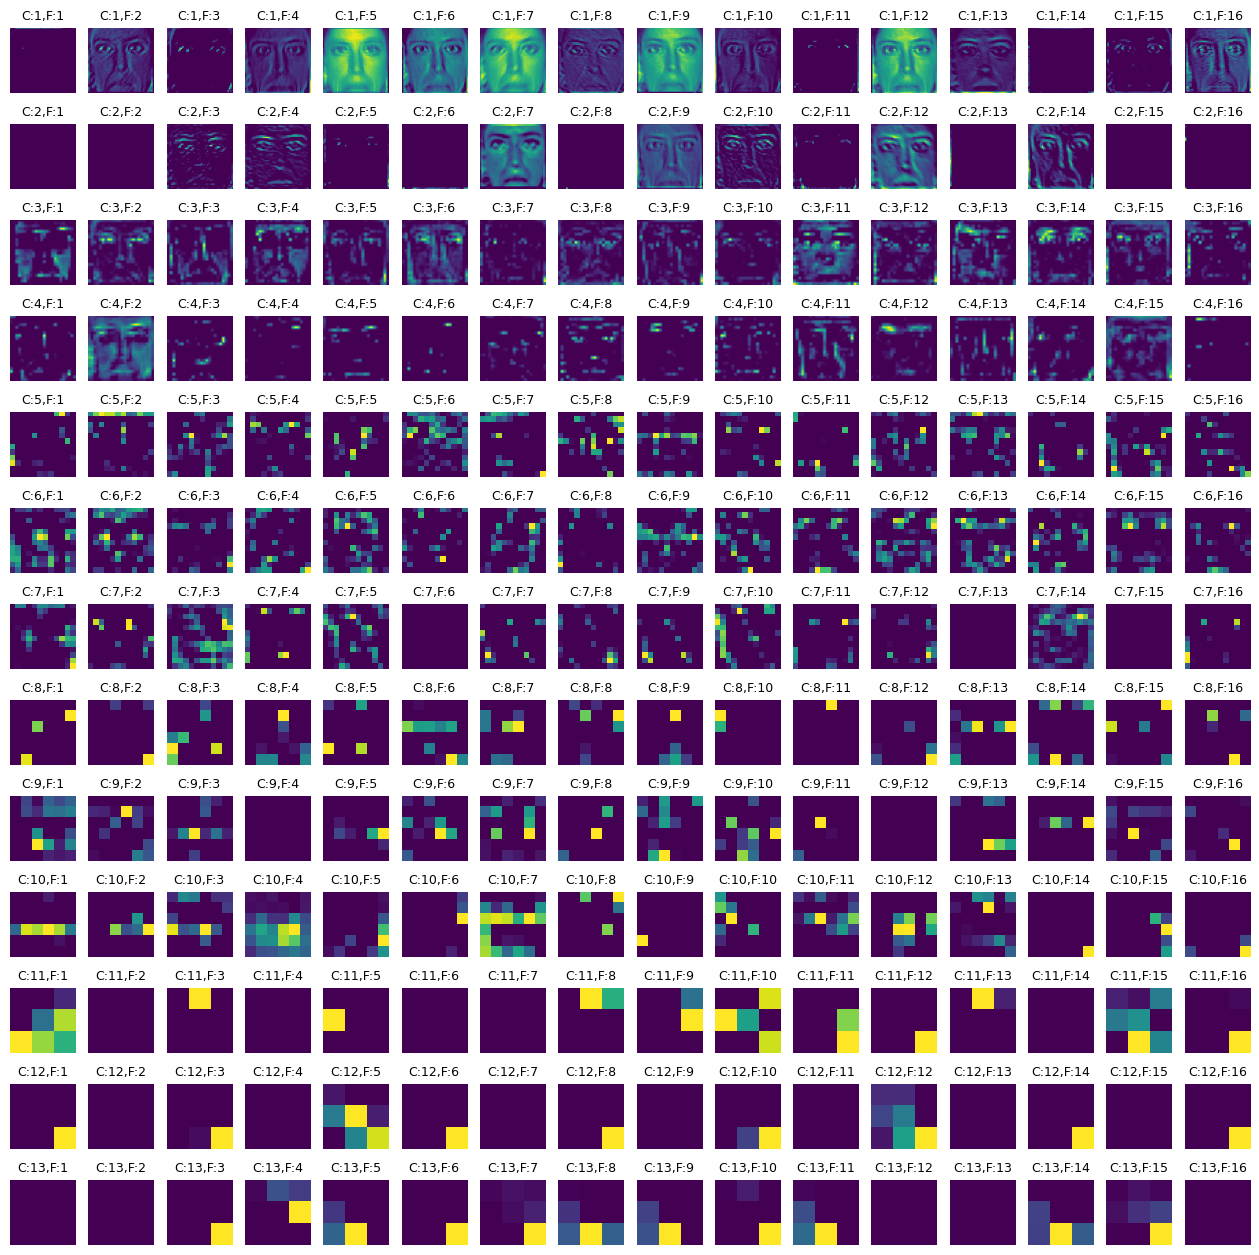

<Figure size 640x480 with 0 Axes>

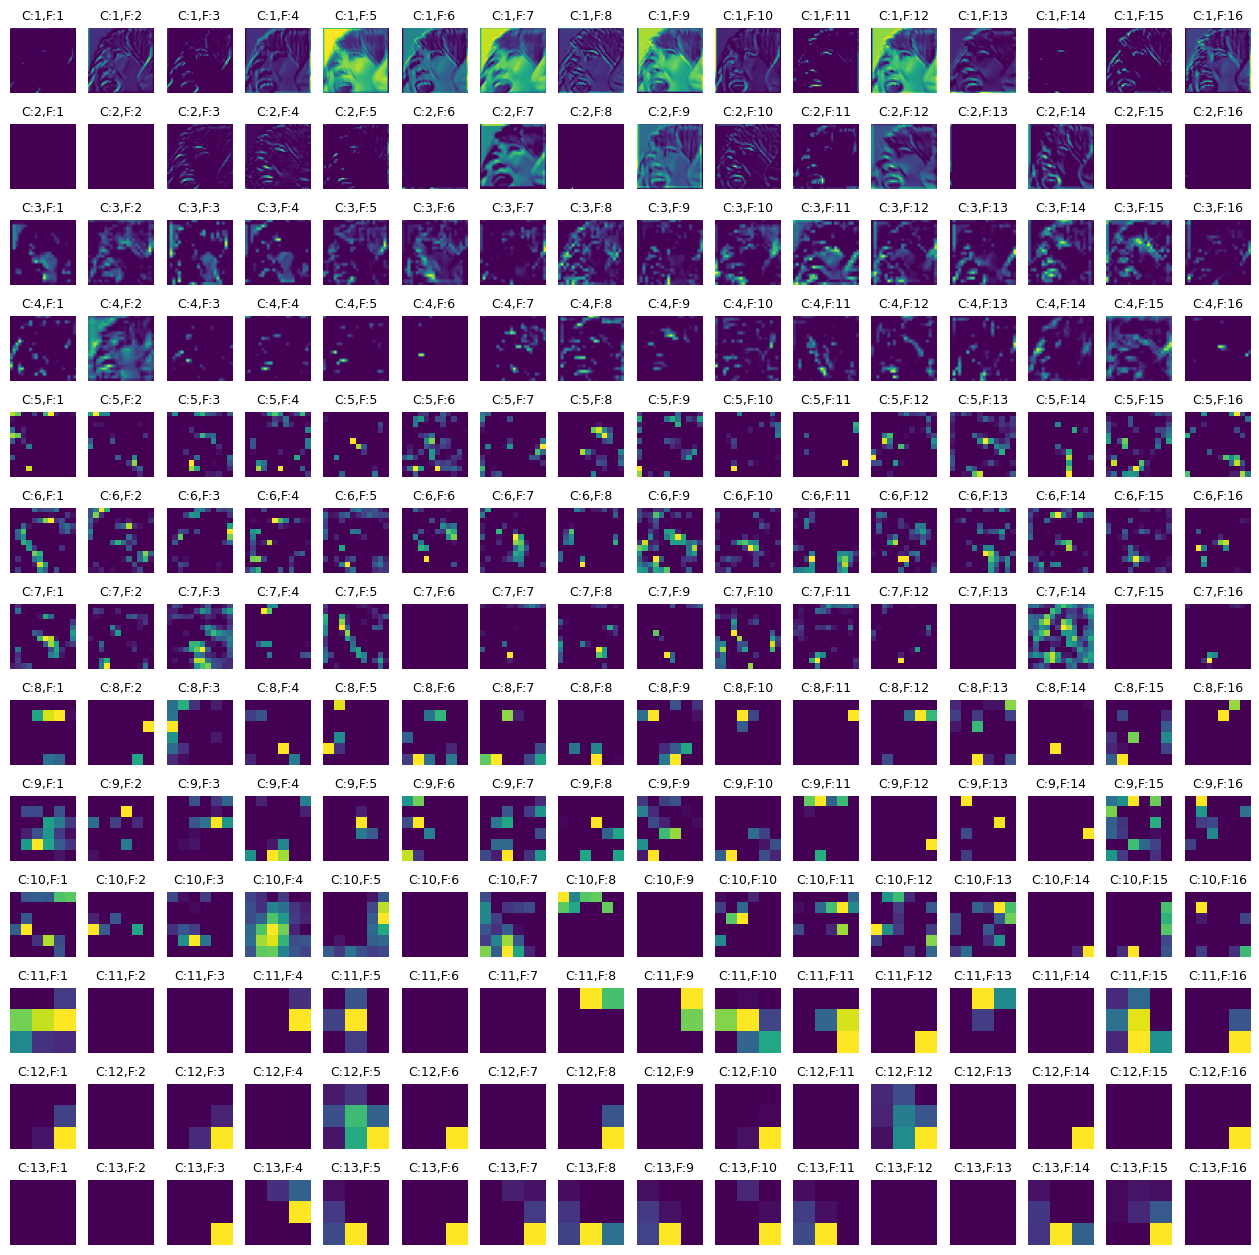

<Figure size 640x480 with 0 Axes>

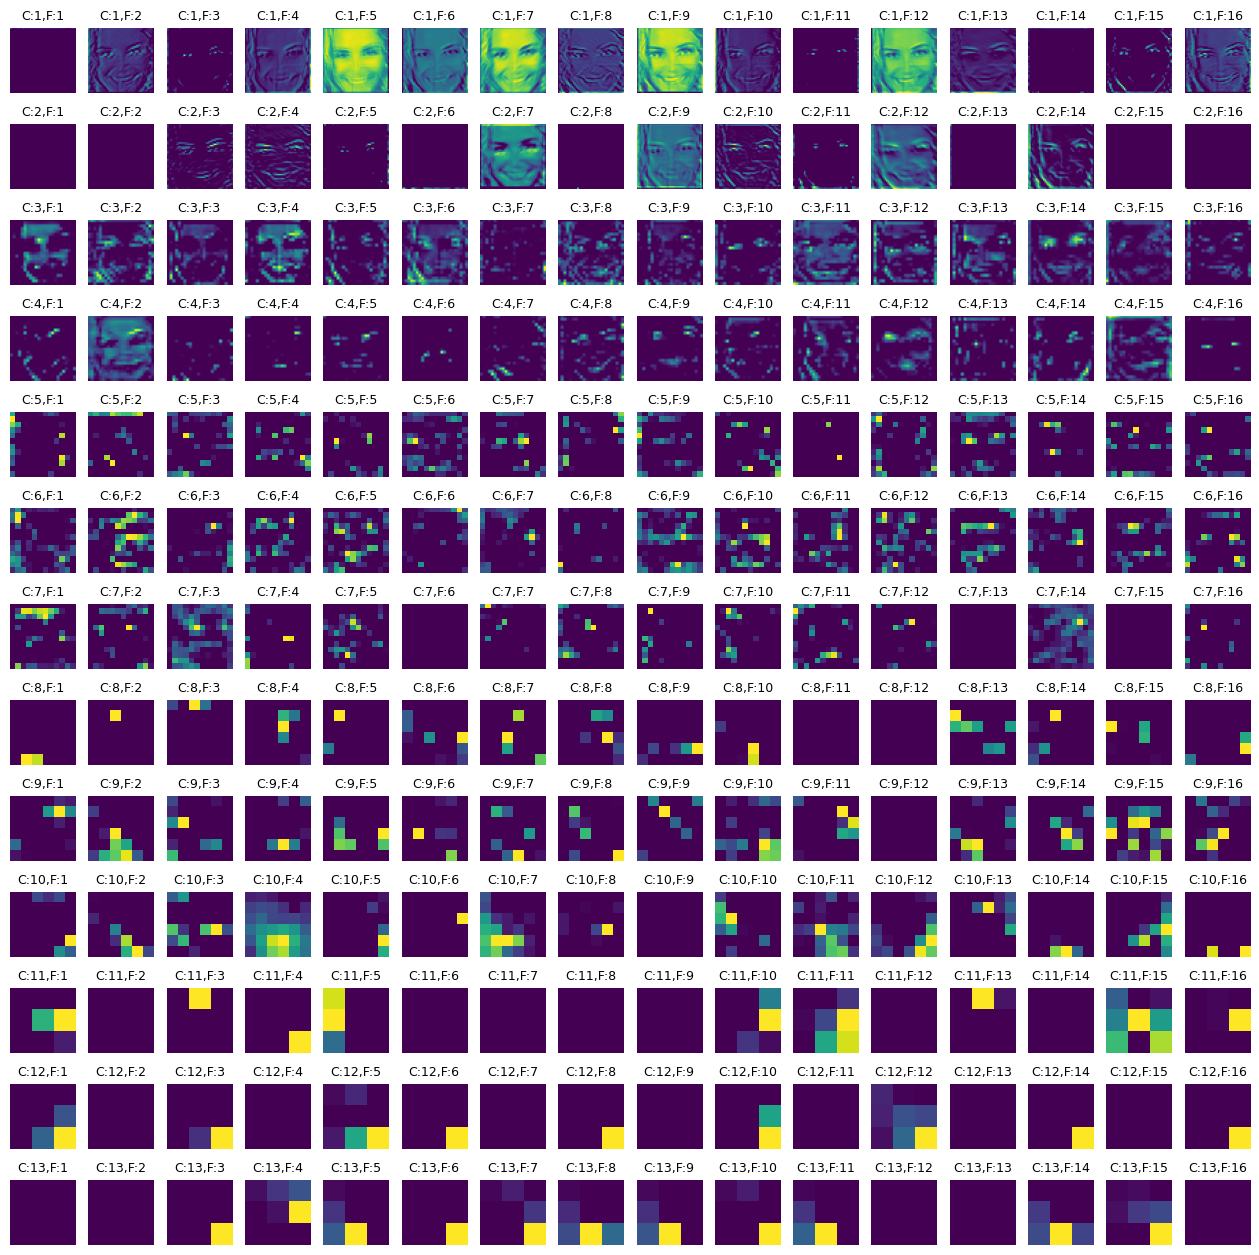

<Figure size 640x480 with 0 Axes>

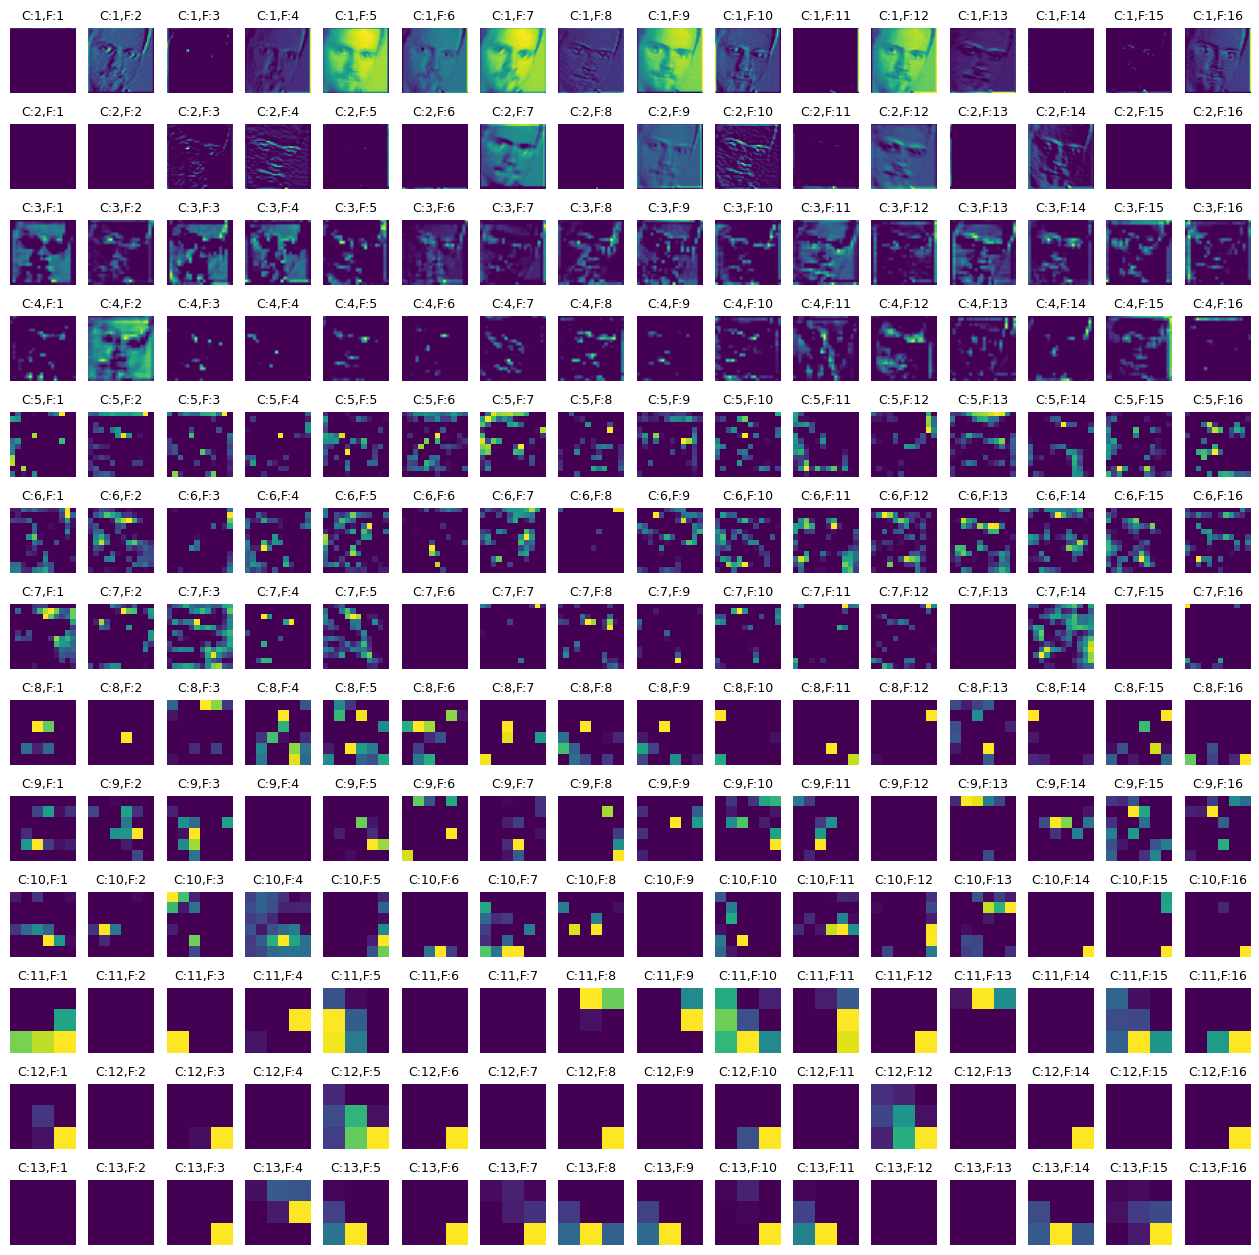

<Figure size 640x480 with 0 Axes>

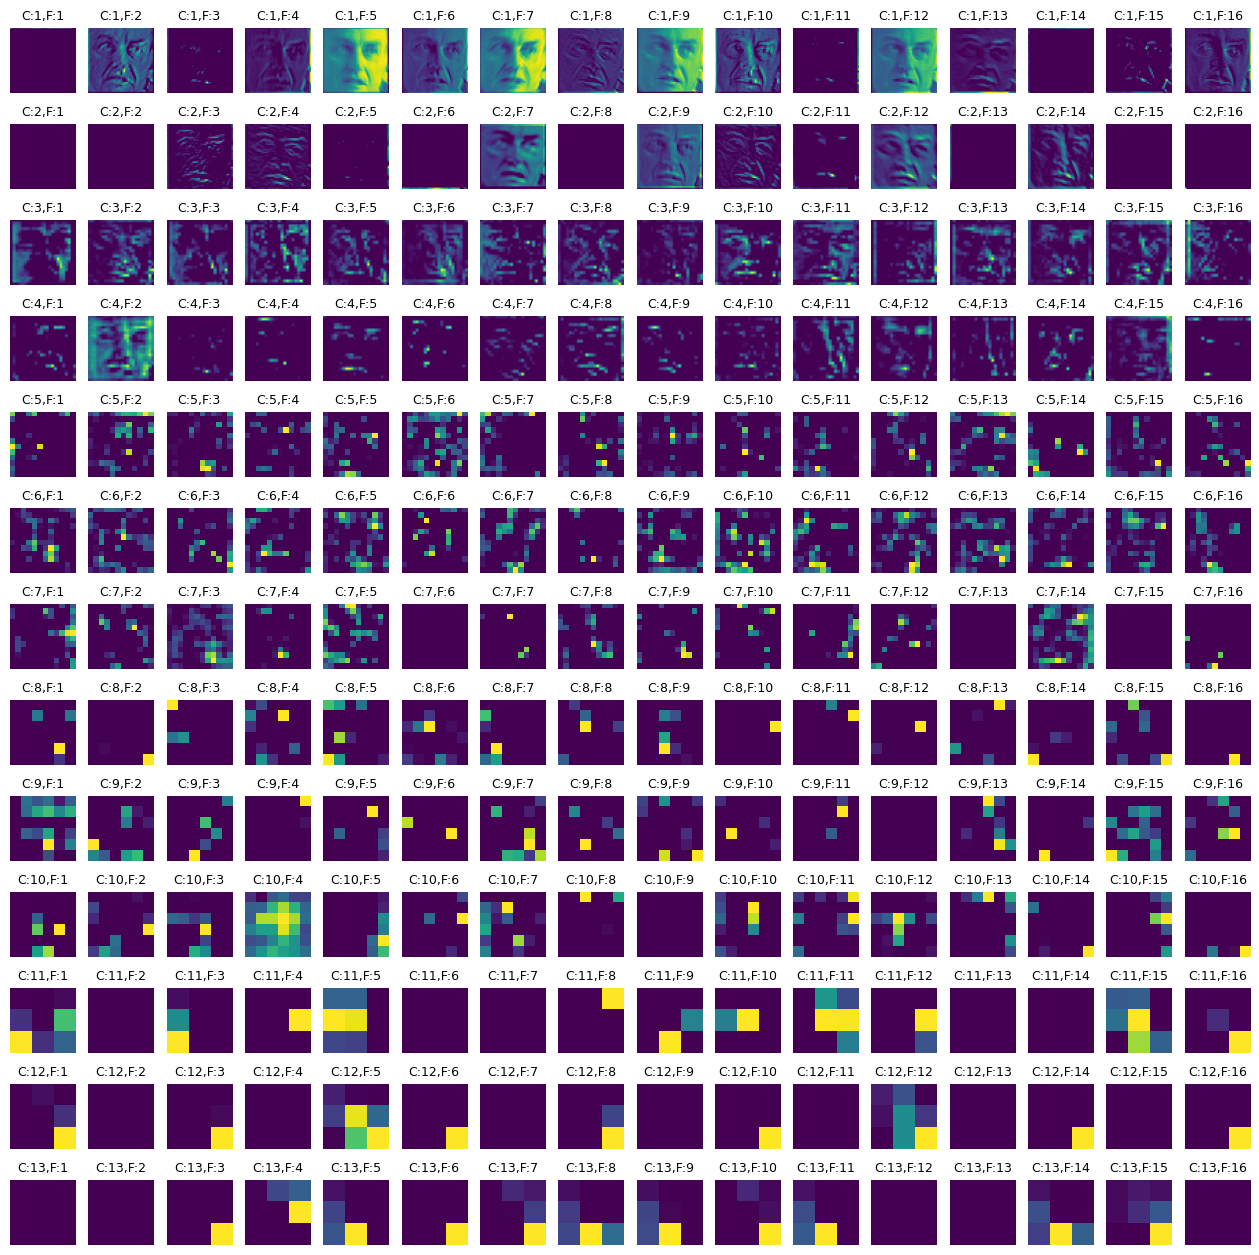

<Figure size 640x480 with 0 Axes>

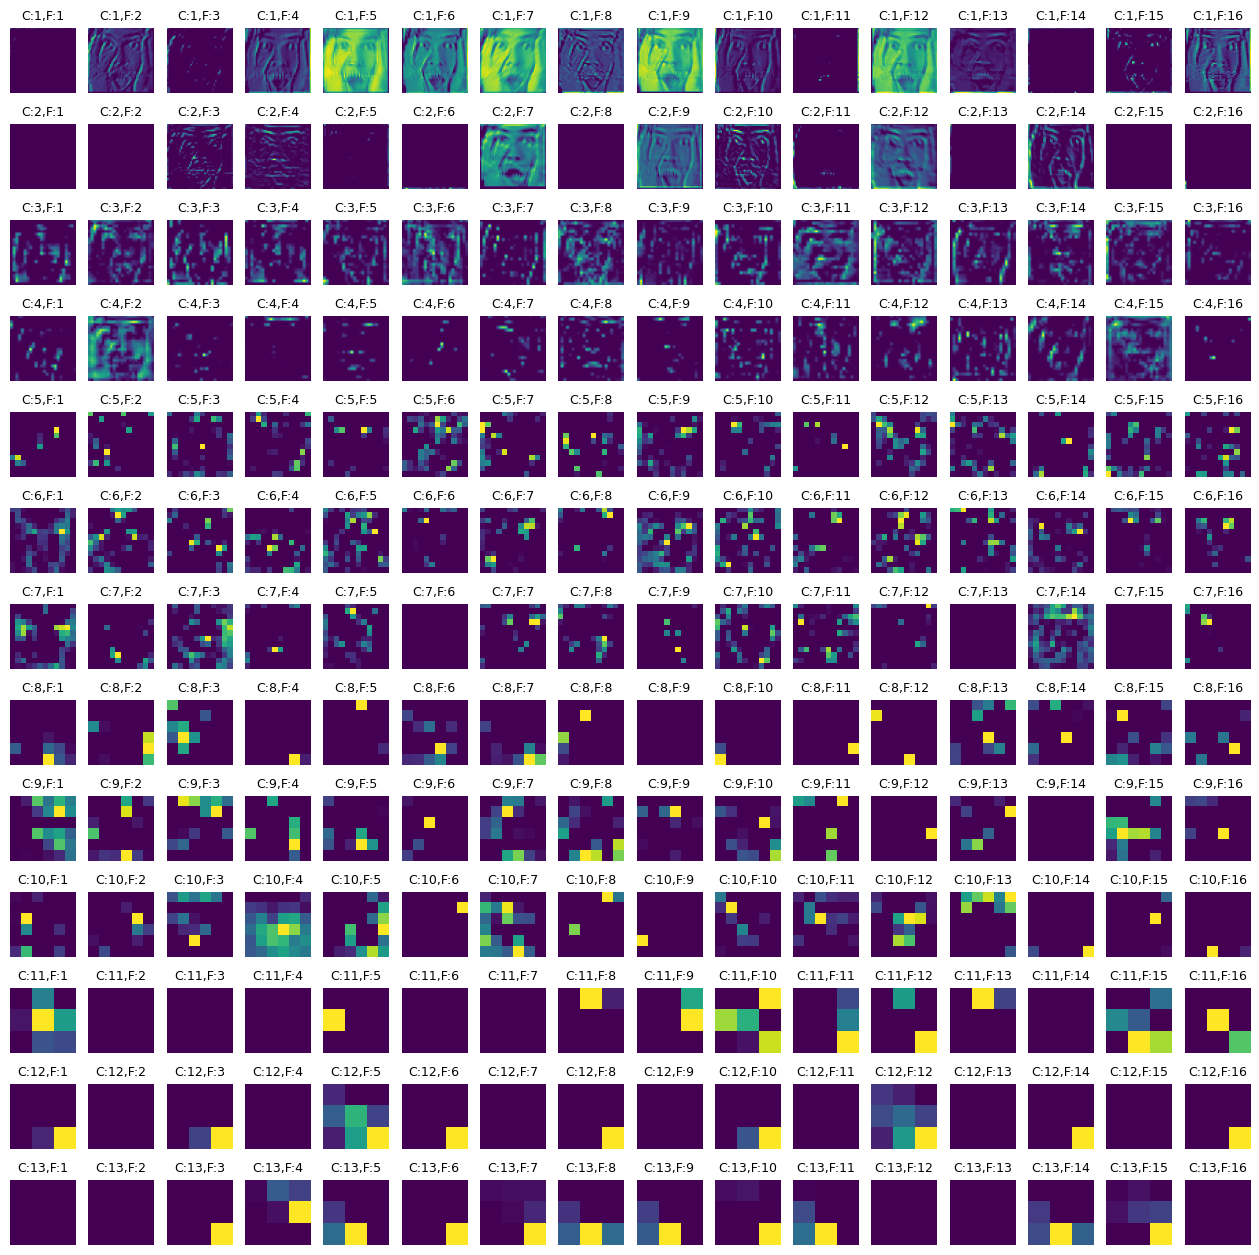

<Figure size 640x480 with 0 Axes>

In [13]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

for feature_maps, emotion in zip(different_emotion_feature_maps, emotions):
    plot_feature_maps(
        feature_maps,
        file_name= f'{emotion}.png'
    )